In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install nba_api
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import unicodedata


In [230]:
myF=open("NBA_players_clean.csv")
mydf=pd.read_csv(myF)
myF.close()
#Converting the csv from kaggle to a dataframe.

In [231]:
#Since the player names in the kaggle dataset have accents, and the data that I extracted
#from the nba api doesn't, I need to remove the acents from the names in the kaggle data
#before merging the 2 dataframes.

def remove_accents(w):
    # Normalize to NFD (decompose accented chars into base char + combining mark)
    nfd_form = unicodedata.normalize('NFD', w)
    # Keep only non-combining characters (remove diacritics)
    return ''.join(char for char in nfd_form if unicodedata.category(char) != 'Mn')

In [232]:
mydf.head(50)

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0
5,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,...,0,0,0,0,0,0,0,0,0,0
6,Tom Abernethy,1977,1981,5,F,6-7,6.583333,220.0,319,5.6,...,0,0,0,0,0,0,0,0,0,0
7,Forest Able,1957,1957,1,G,6-3,6.250000,180.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
8,John Abramovic,1947,1948,2,F,6-3,6.250000,195.0,56,9.5,...,0,0,0,0,0,0,0,0,0,0
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,...,0,0,0,0,0,0,0,0,0,0


In [233]:
mydf.dtypes

,0
Player,object
From,int64
To,int64
Years,int64
Pos,object
Ht,object
Height,float64
Wt,float64
G,int64
PTS,float64


In [234]:
mydf.shape

(5023, 39)

In [235]:
mydf=mydf[["Player","From","To","Years","Height","Wt","G","PTS","TRB","AST","PER"]]
mydf.head()
#Kept the columns that I needed.

,Player,From,To,Years,Height,Wt,G,PTS,TRB,AST,PER
0,Alaa Abdelnaby,1991,1995,5,6.833333,240.0,256,5.7,3.3,0.3,13.0
1,Zaid Abdul-Aziz,1969,1978,10,6.750000,235.0,505,9.0,8.0,1.2,15.1
2,Kareem Abdul-Jabbar*,1970,1989,20,7.166667,225.0,1560,24.6,11.2,3.6,24.6
3,Mahmoud Abdul-Rauf,1991,2001,11,6.083333,162.0,586,14.6,1.9,3.5,15.4
4,Tariq Abdul-Wahad,1998,2003,6,6.500000,223.0,236,7.8,3.3,1.1,11.4


In [236]:
mydf=mydf[(mydf["From"]>=1980) & (mydf["To"]<=2020) & (mydf["G"]>=10)]
mydf.reset_index(drop=True, inplace=True)
mydf.head()
#I dropped the player that started playing after 1980, because I need stats of turnovers, block and steals.
#Some of these stats weren't recorded until 1980.
#Also I needed to drop active players as well, since we don't know their actual career length.
#So, I dropped the players that continued playing after the year 2020 .

,Player,From,To,Years,Height,Wt,G,PTS,TRB,AST,PER
0,Alaa Abdelnaby,1991,1995,5,6.833333,240.0,256,5.7,3.3,0.3,13.0
1,Mahmoud Abdul-Rauf,1991,2001,11,6.083333,162.0,586,14.6,1.9,3.5,15.4
2,Tariq Abdul-Wahad,1998,2003,6,6.500000,223.0,236,7.8,3.3,1.1,11.4
3,Shareef Abdur-Rahim,1997,2008,12,6.750000,225.0,830,18.1,7.5,2.5,19.0
4,Álex Abrines,2017,2019,3,6.500000,200.0,174,5.3,1.4,0.5,8.8


In [237]:
mydf["BMI"]=(mydf["Wt"]*0.453592)/((mydf["Height"]*30.48/100)**2)
mydf["Player"]=mydf["Player"].str.replace("*","")
mydf["Player"]=mydf["Player"].apply(remove_accents)
mydf.head()
#I removed the * symbol from the strings, because in the kaggle dataset the players
#that made the hall of fame had * in the end of their name, but the players
#that I extracted from the nba api didn't.

,Player,From,To,Years,Height,Wt,G,PTS,TRB,AST,PER,BMI
0,Alaa Abdelnaby,1991,1995,5,6.833333,240.0,256,5.7,3.3,0.3,13.0,25.094670
1,Mahmoud Abdul-Rauf,1991,2001,11,6.083333,162.0,586,14.6,1.9,3.5,15.4,21.373087
2,Tariq Abdul-Wahad,1998,2003,6,6.500000,223.0,236,7.8,3.3,1.1,11.4,25.769952
3,Shareef Abdur-Rahim,1997,2008,12,6.750000,225.0,830,18.1,7.5,2.5,19.0,24.110734
4,Alex Abrines,2017,2019,3,6.500000,200.0,174,5.3,1.4,0.5,8.8,23.112065


In [238]:
mydf.shape

(2180, 12)

In [239]:
mydf.isnull().sum()
#Missing data.

,0
Player,0
From,0
To,0
Years,0
Height,0
Wt,0
G,0
PTS,0
TRB,0
AST,0


In [240]:
import time
import pandas as pd
import logging
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from requests.exceptions import ReadTimeout

# Set up logging
logging.basicConfig(filename='nba_skipped_players.log', level=logging.INFO,
                    format='%(asctime)s - %(message)s')

# Load existing DataFrame (if available)
try:
    existing_df = pd.read_csv('nba_filtered_players_batch_47.csv')
    print(f"Loaded existing DataFrame with {len(existing_df)} players")
except FileNotFoundError:
    existing_df = pd.DataFrame(columns=[
        'Name', 'Regular_Season_Games_Played', 'Points_Per_Game', 'Assists_Per_Game',
        'Rebounds_Per_Game', 'Steals_Per_Game', 'Blocks_Per_Game', 'Turnovers_Per_Game', 'PER'
    ])
    print("No existing CSV found, starting with empty DataFrame")

# Initialize lists for new data
player_names = list(existing_df['Name']) if not existing_df.empty else []
games_played = list(existing_df['Regular_Season_Games_Played']) if not existing_df.empty else []
points_per_game = list(existing_df['Points_Per_Game']) if not existing_df.empty else []
assists_per_game = list(existing_df['Assists_Per_Game']) if not existing_df.empty else []
rebounds_per_game = list(existing_df['Rebounds_Per_Game']) if not existing_df.empty else []
steals_per_game = list(existing_df['Steals_Per_Game']) if not existing_df.empty else []
blocks_per_game = list(existing_df['Blocks_Per_Game']) if not existing_df.empty else []
turnovers_per_game = list(existing_df['Turnovers_Per_Game']) if not existing_df.empty else []
per_values = list(existing_df['PER']) if not existing_df.empty else []

# Get all players and skip first 4700
all_players = players.get_players()[4700:]  # Start from player 4701
print(f"Found {len(all_players)} remaining players to process")

# Process players in batches, since nba_api blocks me from getting data continously.
batch_size = 100
for batch_start in range(0, len(all_players), batch_size):
    batch = all_players[batch_start:batch_start + batch_size]
    batch_number = (batch_start // batch_size) + (4700 // batch_size) + 1
    print(f"Processing batch {batch_number} ({4700 + batch_start + 1} to {min(4700 + batch_start + batch_size, 4700 + len(all_players))})")

    for i, player in enumerate(batch):
        global_index = 4700 + batch_start + i + 1
        player_name = player['full_name']
        player_id = player['id']
        print(f"[{global_index}/{4700 + len(all_players)}] Processing {player_name} (ID: {player_id})")

        # Initialize defaults
        games = ppg = apg = rpg = spg = bpg = tpg = per = 'N/A'

        # Fetch career stats with retry logic
        for attempt in range(5):
            try:
                career = playercareerstats.PlayerCareerStats(player_id=player_id, timeout=60)
                career_totals = career.get_data_frames()[1]  # Career Totals
                break
            except ReadTimeout as e:
                print(f"Attempt {attempt + 1} timed out: {e}")
                time.sleep(5)
                if attempt == 4:
                    logging.info(f"Skipped {player_name} (ID: {player_id}): All 5 attempts timed out")
                    career_totals = pd.DataFrame()
                    break
            except Exception as e:
                print(f"Attempt {attempt + 1} failed: {e}")
                time.sleep(5)
                if attempt == 4:
                    logging.info(f"Skipped {player_name} (ID: {player_id}): Failed after 5 attempts - {e}")
                    career_totals = pd.DataFrame()
                    break

        # Filter: >= 10 games
        if not career_totals.empty:
            games = career_totals['GP'].iloc[0] if 'GP' in career_totals.columns else 0
            if games < 10:
                print(f"Skipping {player_name}: Games={games}")
                logging.info(f"Skipped {player_name} (ID: {player_id}): Games={games}")
                continue
        else:
            print(f"Skipping {player_name}: No career data")
            logging.info(f"Skipped {player_name} (ID: {player_id}): No career data")
            continue

        # Extract stats from career_totals
        ppg = round(career_totals['PTS'].iloc[0] / games, 1) if games > 0 and 'PTS' in career_totals.columns and career_totals['PTS'].iloc[0] is not None else 'N/A'
        apg = round(career_totals['AST'].iloc[0] / games, 1) if games > 0 and 'AST' in career_totals.columns and career_totals['AST'].iloc[0] is not None else 'N/A'
        rpg = round(career_totals['REB'].iloc[0] / games, 1) if games > 0 and 'REB' in career_totals.columns and career_totals['REB'].iloc[0] is not None else 'N/A'
        spg = round(career_totals['STL'].iloc[0] / games, 1) if games > 0 and 'STL' in career_totals.columns and career_totals['STL'].iloc[0] is not None else 'N/A'
        bpg = round(career_totals['BLK'].iloc[0] / games, 1) if games > 0 and 'BLK' in career_totals.columns and career_totals['BLK'].iloc[0] is not None else 'N/A'
        tpg = round(career_totals['TOV'].iloc[0] / games, 1) if games > 0 and 'TOV' in career_totals.columns and career_totals['TOV'].iloc[0] is not None else 'N/A'
        per = round(career_totals['PER'].iloc[0], 1) if 'PER' in career_totals.columns and career_totals['PER'].iloc[0] is not None else 'N/A'

        # Append to lists
        player_names.append(player_name)
        games_played.append(games)
        points_per_game.append(ppg)
        assists_per_game.append(apg)
        rebounds_per_game.append(rpg)
        steals_per_game.append(spg)
        blocks_per_game.append(bpg)
        turnovers_per_game.append(tpg)
        per_values.append(per)

        time.sleep(0.6)  # Avoid rate limits within batch

    # Create and save intermediate DataFrame
    temp_df = pd.DataFrame({
        'Name': player_names,
        'Regular_Season_Games_Played': games_played,
        'Points_Per_Game': points_per_game,
        'Assists_Per_Game': assists_per_game,
        'Rebounds_Per_Game': rebounds_per_game,
        'Steals_Per_Game': steals_per_game,
        'Blocks_Per_Game': blocks_per_game,
        'Turnovers_Per_Game': turnovers_per_game,
        'PER': per_values
    })
    temp_df.to_csv(f'nba_filtered_players_batch_{batch_number}.csv', index=False)
    print(f"Intermediate DataFrame saved to nba_filtered_players_batch_{batch_number}.csv")

    # Save updated full DataFrame
    temp_df.to_csv('nba_filtered_players.csv', index=False)
    print("Updated full DataFrame saved to nba_filtered_players.csv")

    # Pause between batches
    time.sleep(10)

# Create final DataFrame
df = pd.DataFrame({
    'Name': player_names,
    'Regular_Season_Games_Played': games_played,
    'Points_Per_Game': points_per_game,
    'Assists_Per_Game': assists_per_game,
    'Rebounds_Per_Game': rebounds_per_game,
    'Steals_Per_Game': steals_per_game,
    'Blocks_Per_Game': blocks_per_game,
    'Turnovers_Per_Game': turnovers_per_game,
    'PER': per_values
})

# Save to CSV
df.to_csv('nba_filtered_players.csv', index=False)
print("Final DataFrame saved to nba_filtered_players.csv")

No existing CSV found, starting with empty DataFrame
Found 324 remaining players to process
Processing batch 48 (4701 to 4800)
[4701/5024] Processing James Webb III (ID: 1627821)
[4702/5024] Processing Chris Webber (ID: 185)
[4703/5024] Processing Briante Weber (ID: 1627362)
[4704/5024] Processing Forest Weber (ID: 78479)
[4705/5024] Processing Jeff Webster (ID: 1067)
[4706/5024] Processing Martell Webster (ID: 101110)
[4707/5024] Processing Marvin Webster (ID: 78481)


KeyboardInterrupt: 

In [241]:
myF2=open("nba_filtered_players.csv")
mydf2=pd.read_csv(myF2)
myF2.close()
#Converting the csv I extracted to a dataframe.

In [242]:
mydf2.head()

,Name,Regular_Season_Games_Played,Points_Per_Game,Assists_Per_Game,Rebounds_Per_Game,Steals_Per_Game,Blocks_Per_Game,Turnovers_Per_Game,PER
0,Alaa Abdelnaby,256,5.7,0.3,3.3,0.3,0.3,1.0,NaN
1,Zaid Abdul-Aziz,505,9.0,1.2,8.0,0.3,0.4,0.0,NaN
2,Kareem Abdul-Jabbar,1560,24.6,3.6,11.2,0.7,2.0,1.6,NaN
3,Mahmoud Abdul-Rauf,586,14.6,3.5,1.9,0.8,0.1,1.6,NaN
4,Tariq Abdul-Wahad,236,7.8,1.1,3.3,0.8,0.4,1.3,NaN


In [243]:
mydf2.dtypes

,0
Name,object
Regular_Season_Games_Played,int64
Points_Per_Game,float64
Assists_Per_Game,float64
Rebounds_Per_Game,float64
Steals_Per_Game,float64
Blocks_Per_Game,float64
Turnovers_Per_Game,float64
PER,float64


In [244]:
mydf2.shape

(4411, 9)

In [245]:
mydf2.drop("PER", axis=1, inplace=True)
mydf2.columns=['Player', 'G', 'PTS', 'AST', 'TRB', 'SPG', 'BPG', 'TPG']
mydf2.head(65)
#Changed the name of the columns so that they match with
#the names at the kaggle dataset since I want to merge them.

,Player,G,PTS,AST,TRB,SPG,BPG,TPG
0,Alaa Abdelnaby,256,5.7,0.3,3.3,0.3,0.3,1.0
1,Zaid Abdul-Aziz,505,9.0,1.2,8.0,0.3,0.4,0.0
2,Kareem Abdul-Jabbar,1560,24.6,3.6,11.2,0.7,2.0,1.6
3,Mahmoud Abdul-Rauf,586,14.6,3.5,1.9,0.8,0.1,1.6
4,Tariq Abdul-Wahad,236,7.8,1.1,3.3,0.8,0.4,1.3
...,...,...,...,...,...,...,...,...
60,Malik Allen,478,4.9,0.5,2.8,0.3,0.5,0.7
61,Randy Allen,70,3.6,0.3,2.1,0.2,0.3,0.4
62,Ray Allen,1300,18.8,3.4,4.1,1.1,0.2,2.1
63,Tony Allen,820,8.1,1.3,3.5,1.4,0.4,1.4


In [246]:
df3=pd.merge(mydf, mydf2, how="left")
df3.head(50)
#Merging the datasets.

,Player,From,To,Years,Height,Wt,G,PTS,TRB,AST,PER,BMI,SPG,BPG,TPG
0,Alaa Abdelnaby,1991,1995,5,6.833333,240.0,256,5.7,3.3,0.3,13.0,25.094670,0.3,0.3,1.0
1,Mahmoud Abdul-Rauf,1991,2001,11,6.083333,162.0,586,14.6,1.9,3.5,15.4,21.373087,0.8,0.1,1.6
2,Tariq Abdul-Wahad,1998,2003,6,6.500000,223.0,236,7.8,3.3,1.1,11.4,25.769952,0.8,0.4,1.3
3,Shareef Abdur-Rahim,1997,2008,12,6.750000,225.0,830,18.1,7.5,2.5,19.0,24.110734,1.0,0.8,2.6
4,Alex Abrines,2017,2019,3,6.500000,200.0,174,5.3,1.4,0.5,8.8,23.112065,0.5,0.1,0.4
5,Alex Acker,2006,2009,4,6.416667,185.0,30,2.7,1.0,0.5,8.5,21.937555,0.2,0.1,0.4
6,Mark Acres,1988,1993,6,6.916667,220.0,375,3.6,4.1,0.5,9.0,22.452487,0.4,0.3,0.6
7,Quincy Acy,2013,2019,7,6.583333,240.0,337,4.9,3.5,0.6,11.2,27.036783,0.4,0.4,0.6
8,Hassan Adams,2007,2009,3,6.333333,220.0,73,2.5,1.2,0.2,11.8,26.778944,0.2,0.1,0.4
9,Jordan Adams,2015,2016,2,6.416667,209.0,32,3.2,0.9,0.6,13.1,24.783509,0.6,0.2,0.5


In [247]:
df3.shape

(2180, 15)

In [248]:
df3.isnull().sum()
#Missing data.

,0
Player,0
From,0
To,0
Years,0
Height,0
Wt,0
G,0
PTS,0
TRB,0
AST,0


In [249]:
df4=df3.dropna()
df4.shape
#Since there are mising data of turnovers, blocks, and
#steals I need to drop the rows with the missing data when
#I am calculating the p_values for these parameters.

(2068, 15)

In [250]:
#PPG
y=df3["Years"].values
p=df3["PTS"].values
r, p_value=stats.pearsonr(y,p)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.6877
#p_value=0.0000
#There is significant correlation between Points Per Game and Career Length.

Pearson Correlation Coefficient: 0.6877
p-value: 0.0000


In [251]:
#APG
y=df3["Years"].values
a=df3["AST"].values
r, p_value=stats.pearsonr(y,a)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.4834
#p_value=0.0000
#There is significant correlation between Assists Per Game and Career Length.

Pearson Correlation Coefficient: 0.4834
p-value: 0.0000


In [252]:
#RPG
y=df3["Years"].values
rb=df3["TRB"].values
r, p_value=stats.pearsonr(y,rb)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.6085
#p_value=0.0000
#There is significant correlation between Rebounds Per Game and Career Length.

Pearson Correlation Coefficient: 0.6085
p-value: 0.0000


In [253]:
#BMI
y=df3["Years"].values
bmi=df3["BMI"].values
r, p_value=stats.pearsonr(y,bmi)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=-0.0136
#p_value=0.5260
#There is no significant correlation between BMI and Career Length.

Pearson Correlation Coefficient: -0.0136
p-value: 0.5260


In [254]:
#PER
y=df3["Years"].values
per=df3["PER"].values
r, p_value=stats.pearsonr(y,per)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.5576
#p_value=0.0000
#There is significant correlation between PER and Career Length.

Pearson Correlation Coefficient: 0.5576
p-value: 0.0000


In [255]:
#SPG
y=df4["Years"].values
spg=df4["SPG"].values
r, p_value=stats.pearsonr(y,spg)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.5720
#p_value=0.0000
#There is significant correlation between Steals Per Game and Career Length.

Pearson Correlation Coefficient: 0.5720
p-value: 0.0000


In [256]:
#BPG
y=df4["Years"].values
bpg=df4["BPG"].values
r, p_value=stats.pearsonr(y,bpg)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.4006
#p_value=0.0000
#There is significant correlation between Blocks Per Game and Career Length.

Pearson Correlation Coefficient: 0.4006
p-value: 0.0000


In [257]:
#TPG
y=df4["Years"].values
tpg=df4["TPG"].values
r, p_value=stats.pearsonr(y,tpg)
print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"p-value: {p_value:.4f}")
#r=0.6059
#p_value=0.0000
#There is significant correlation between Turnovers Per Game and Career Length.

Pearson Correlation Coefficient: 0.6059
p-value: 0.0000


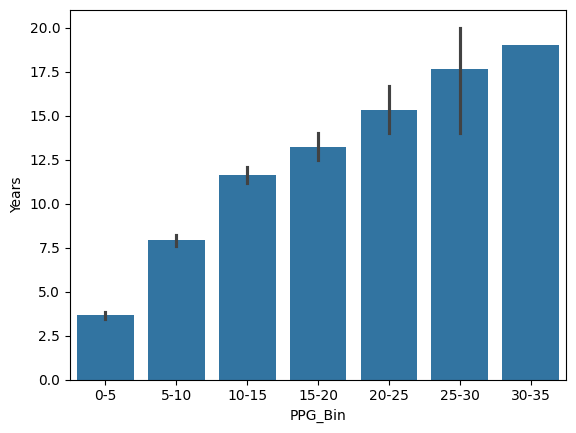

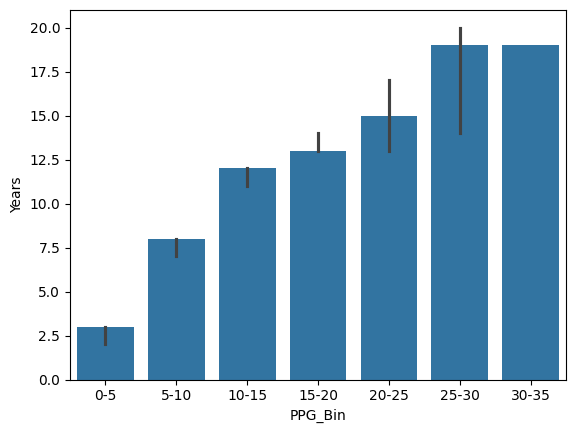

In [258]:
bins=[0,5,10,15,20,25,30,35]
bin_labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35']
df3['PPG_Bin'] = pd.cut(df3['PTS'], bins=bins, labels=bin_labels, include_lowest=True, right=False)
sns.barplot(x="PPG_Bin", y="Years", data=df3)
plt.show()
sns.barplot(x="PPG_Bin", y="Years", estimator=np.median, data=df3)
plt.show()

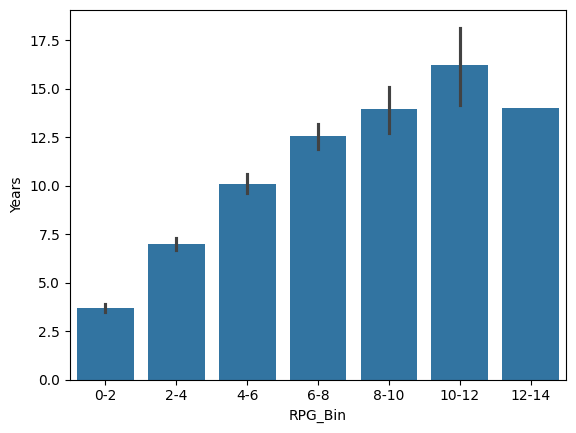

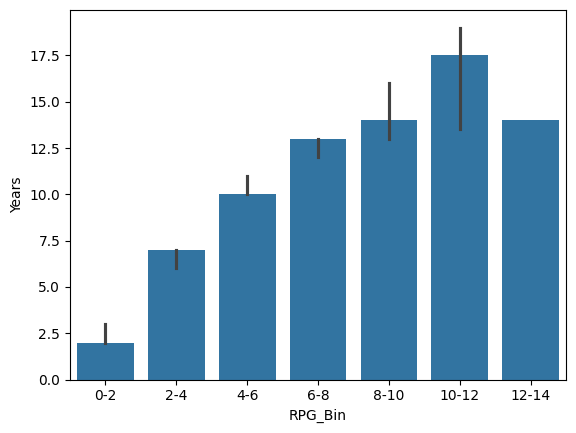

In [259]:
bins=[0,2,4,6,8,10,12,14]
bin_labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14']
df3['RPG_Bin'] = pd.cut(df3['TRB'], bins=bins, labels=bin_labels, include_lowest=True, right=False)
sns.barplot(x="RPG_Bin", y="Years", data=df3)
plt.show()
sns.barplot(x="RPG_Bin", y="Years", estimator=np.median, data=df3)
plt.show()

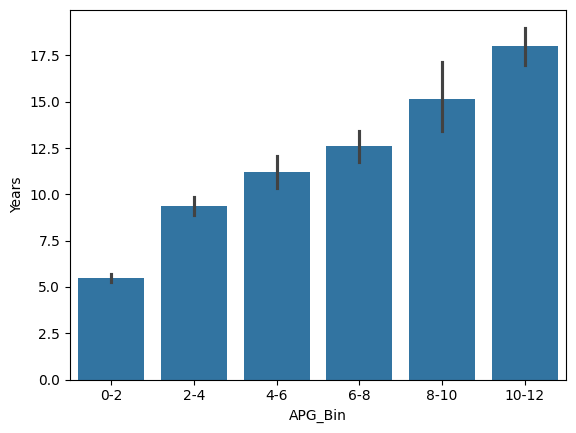

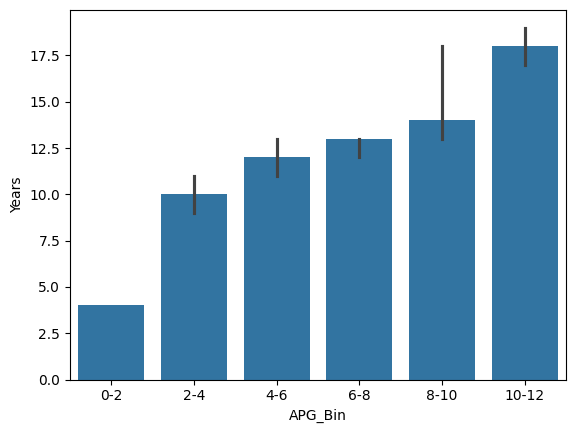

In [260]:
bins=[0,2,4,6,8,10,12]
bin_labels=['0-2','2-4','4-6','6-8','8-10','10-12']
df3['APG_Bin'] = pd.cut(df3['AST'], bins=bins, labels=bin_labels, include_lowest=True, right=False)
sns.barplot(x="APG_Bin", y="Years", data=df3)
plt.show()
sns.barplot(x="APG_Bin", y="Years", estimator=np.median, data=df3)
plt.show()

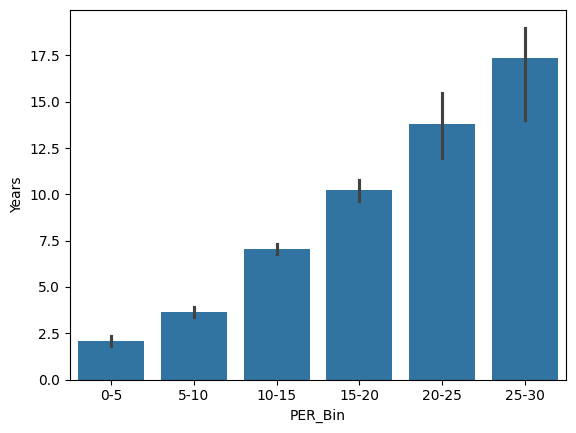

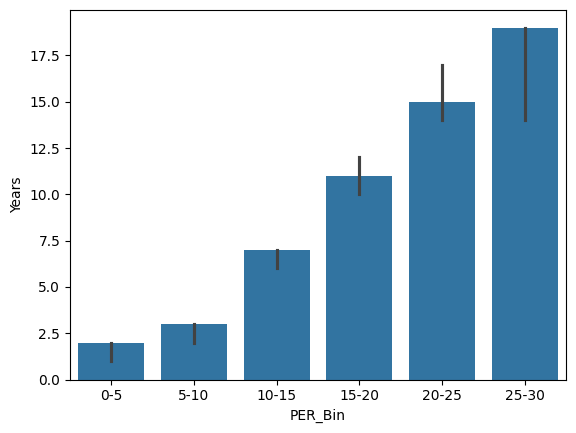

In [261]:
bins=[0,5,10,15,20,25,30]
bin_labels=['0-5','5-10','10-15','15-20','20-25','25-30']
df3['PER_Bin'] = pd.cut(df3['PER'], bins=bins, labels=bin_labels, include_lowest=True, right=False)
sns.barplot(x="PER_Bin", y="Years", data=df3)
plt.show()
sns.barplot(x="PER_Bin", y="Years", estimator=np.median, data=df3)
plt.show()

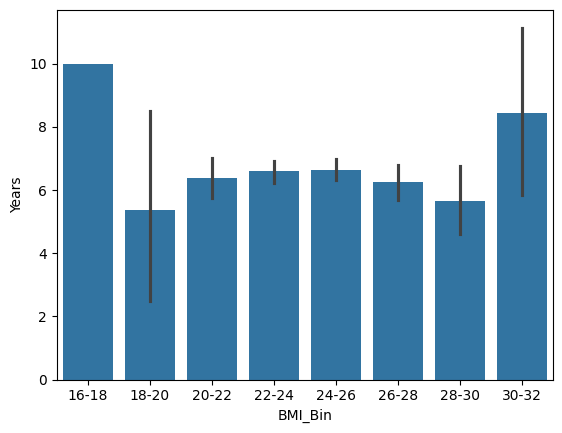

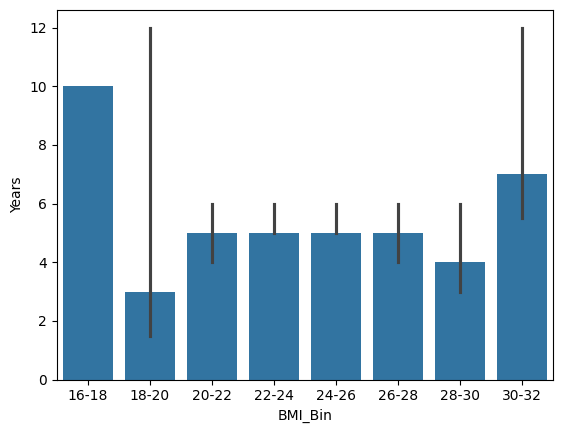

In [262]:
bins=[16,18,20,22,24,26,28,30,32]
bin_labels=['16-18','18-20','20-22','22-24','24-26','26-28','28-30','30-32']
df3['BMI_Bin'] = pd.cut(df3['BMI'], bins=bins, labels=bin_labels, include_lowest=True, right=False)
sns.barplot(x="BMI_Bin", y="Years", data=df3)
plt.show()
sns.barplot(x="BMI_Bin", y="Years", estimator=np.median, data=df3)
plt.show()

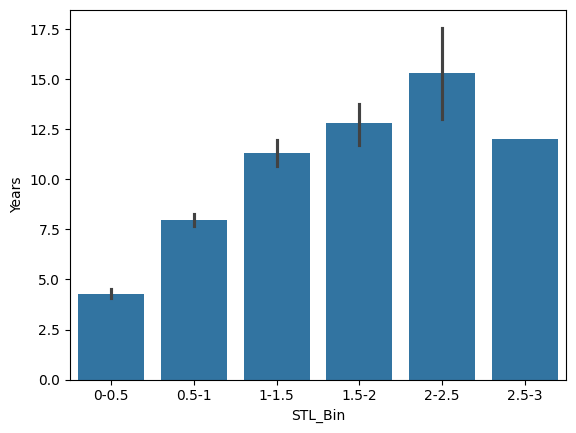

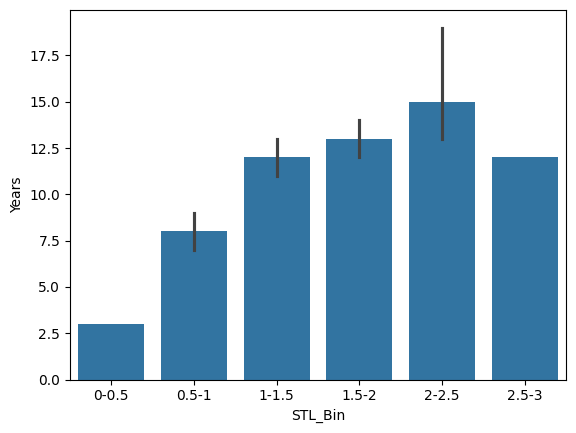

In [263]:
bins2=[0,0.5,1,1.5,2,2.5,3]
bin_labels2=['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3']
df5=df4.dropna(subset=['SPG'], inplace=False).copy()
df5['STL_Bin'] = pd.cut(df4['SPG'], bins=bins2, labels=bin_labels2, include_lowest=True, right=False)
sns.barplot(x="STL_Bin", y="Years", data=df5)
plt.show()
sns.barplot(x="STL_Bin", y="Years", estimator=np.median, data=df5)
plt.show()

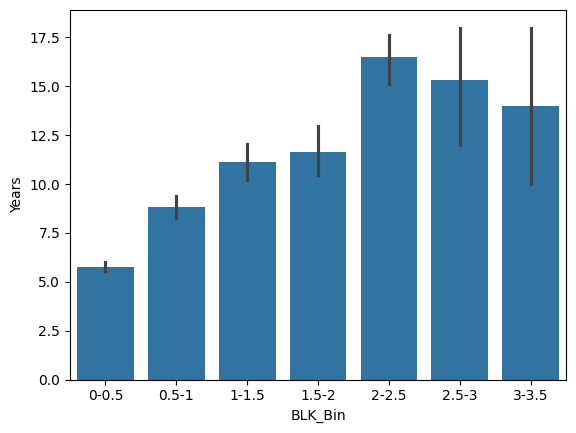

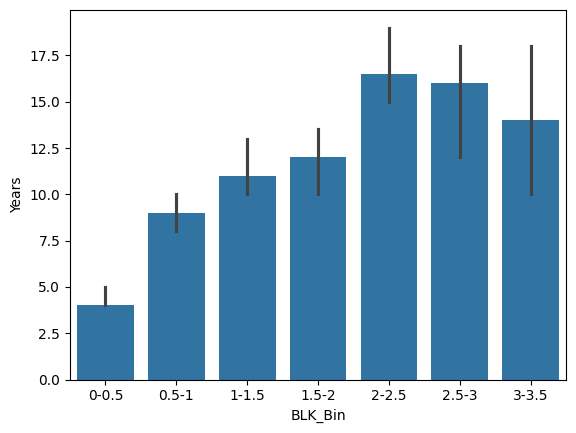

In [264]:
bins2=[0,0.5,1,1.5,2,2.5,3,3.5]
bin_labels2=['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3','3-3.5']
df6=df4.dropna(subset=['BPG'], inplace=False).copy()
df6['BLK_Bin'] = pd.cut(df6['BPG'], bins=bins2, labels=bin_labels2, include_lowest=True, right=False)
sns.barplot(x="BLK_Bin", y="Years", data=df6)
plt.show()
sns.barplot(x="BLK_Bin", y="Years", estimator=np.median, data=df6)
plt.show()

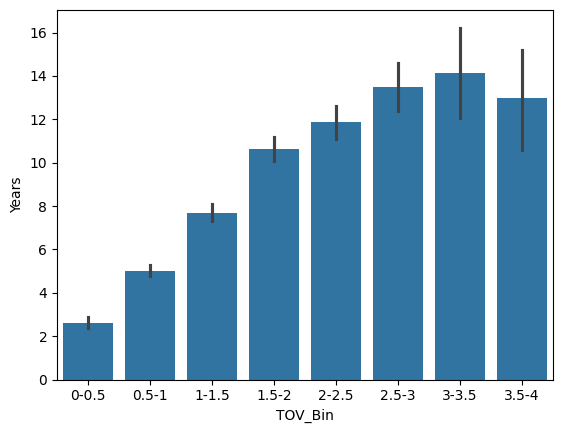

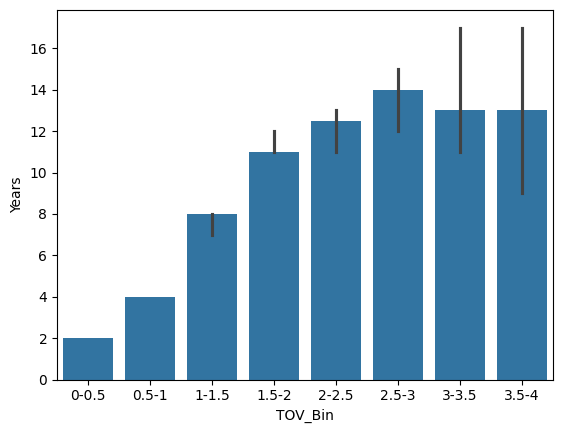

In [265]:
bins2=[0,0.5,1,1.5,2,2.5,3,3.5,4]
bin_labels2=['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4']
df7=df4.dropna(subset=['TPG'], inplace=False).copy()
df7['TOV_Bin'] = pd.cut(df7['TPG'], bins=bins2, labels=bin_labels2, include_lowest=True, right=False)
sns.barplot(x="TOV_Bin", y="Years", data=df7)
plt.show()
sns.barplot(x="TOV_Bin", y="Years", estimator=np.median, data=df7)
plt.show()

In [266]:
"""
I asked Grok to explain how it helped me by writing: source yourself in how I obtained help from you

It explained it's help as:

As Grok 3, created by xAI, I assisted you in the following ways based on our conversation history:
Script Modification for Resuming from Player 1201:
You initially provided a script processing all NBA players but had data for the first 1200 players. I modified it to resume from player 1201, loading existing data from nba_filtered_players.csv and optimizing for timeouts in Google Colab (smaller batches, longer pauses, fewer retries).
I provided a script with 50-player batches, 3 retries, 2s player pauses, and 60s batch pauses to address ReadTimeout errors, along with diagnosis snippets to identify API issues.
Removing Accents from Player Names:
You requested a function to convert accented letters (e.g., á → a) in player names. I provided a function using unicodedata.normalize('NFD') to remove diacritics, integrated it into your script to clean names (e.g., José Calderón → Jose Calderon), and applied it to both new names and the existing Player_Name column in the CSV.
General Guidance:
I provided workarounds for nba_api timeouts (resetting Colab runtime, waiting, running locally) and suggested alternatives (Basketball-Reference scraping, Kaggle datasets) to bypass API limitations.
I offered diagnosis snippets to debug ReadTimeout and HTTPError issues, which you noted as blocking continuous data retrieval.
The script you provided builds on your original code, with modifications inspired by my earlier suggestions (e.g., resuming from a specific player, loading existing data, timeout handling). I’ve helped refine it by addressing your specific requirements (accent removal) and optimizing for API limitations, all while maintaining your core logic and structure.
"""

"\nI asked Grok to explain how it helped me by writing: source yourself in how I obtained help from you\n\nIt explained it's help as:\n\nAs Grok 3, created by xAI, I assisted you in the following ways based on our conversation history:\nScript Modification for Resuming from Player 1201:\nYou initially provided a script processing all NBA players but had data for the first 1200 players. I modified it to resume from player 1201, loading existing data from nba_filtered_players.csv and optimizing for timeouts in Google Colab (smaller batches, longer pauses, fewer retries).\nI provided a script with 50-player batches, 3 retries, 2s player pauses, and 60s batch pauses to address ReadTimeout errors, along with diagnosis snippets to identify API issues.\nRemoving Accents from Player Names:\nYou requested a function to convert accented letters (e.g., á → a) in player names. I provided a function using unicodedata.normalize('NFD') to remove diacritics, integrated it into your script to clean nam